## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking if there are any missing values in dataset

In [4]:
def missingvalues(dfr):
    
    missingvalues = dfr.isnull().sum().sort_values(ascending = False)
    percent = (dfr.isnull().sum()/dfr.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([missingvalues, percent], axis=1, keys=['Missing Values', 'Percent'])

missingvalues(df).head(31)

,Missing Values,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


There are no missing values in the dataset.

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Bar plot showing the number of fraudulent vs non-fraudulent transcations

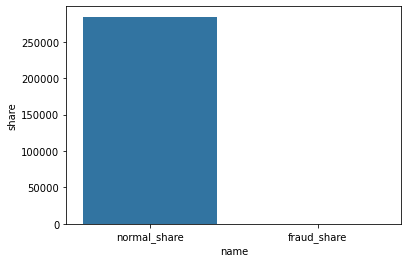

In [6]:
dframe2=pd.DataFrame({'name':['normal_share','fraud_share'],'share':[classes[0],classes[1]]})
# ax=plt.figure(figsize=(16,16))

ax = sns.barplot(x='name',y='share',data=dframe2)

Plotting in log scale as fraud numbers are not visible in normal scale

492
284315


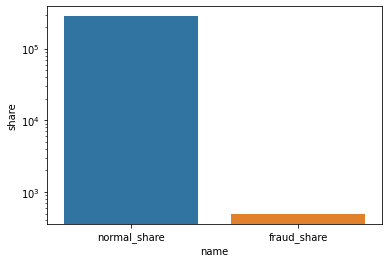

In [7]:
dframe2=pd.DataFrame({'name':['normal_share','fraud_share'],'share':[classes[0],classes[1]]})

ax = sns.barplot(x='name',y='share',data=dframe2)
ax.set_yscale("log")

Bar plot showing the percentage share of fraudulent vs non-fraudulent transcations

           name      share
0  normal_share  99.827251
1   fraud_share   0.172749


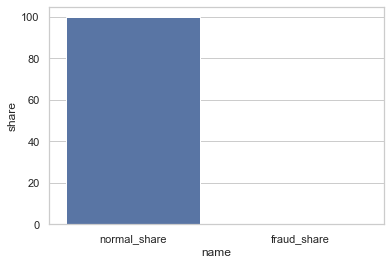

In [8]:
dframe1=pd.DataFrame({'name':['normal_share','fraud_share'],'share':[normal_share,fraud_share]})
print(dframe1)

sns.set(style="whitegrid")

ax = sns.barplot(x='name',y='share',data=dframe1)

Plotting in log scale the above bar plot

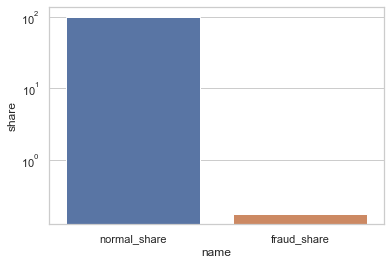

In [9]:
sns.set(style="whitegrid")
ax = sns.barplot(x='name',y='share',data=dframe1)
ax.set_yscale("log")

Scatter plot to observe the distribution of classes with time

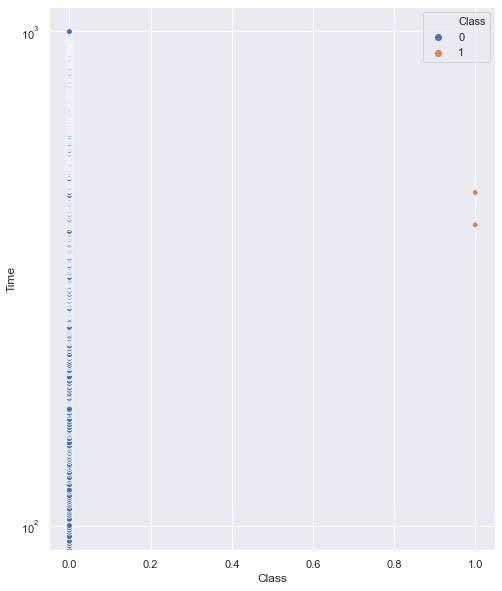

In [10]:

dframe3=df[(df.Time < 1000)]
plt.figure(figsize=(8,10))
sns.set(style="darkgrid")
ax = sns.scatterplot(x="Class", y="Time",hue="Class", data=dframe3)
ax.set_yscale("log")

Scatter plot to observe the distribution of classes with Amount

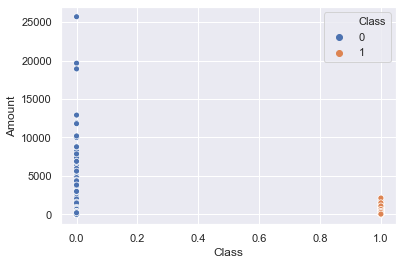

In [11]:

ax = sns.scatterplot(x="Class", y="Amount",hue="Class", data=df)

In [12]:
# Drop unnecessary columns
df_new=df.drop(['Time'],axis=1)
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# Putting Class variable to y
y = df_new['Class']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [14]:
# Putting feature variable to X
X = df_new.drop(['Class'], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

### Splitting the data into train & test data

In [15]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train_saved= X_train

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

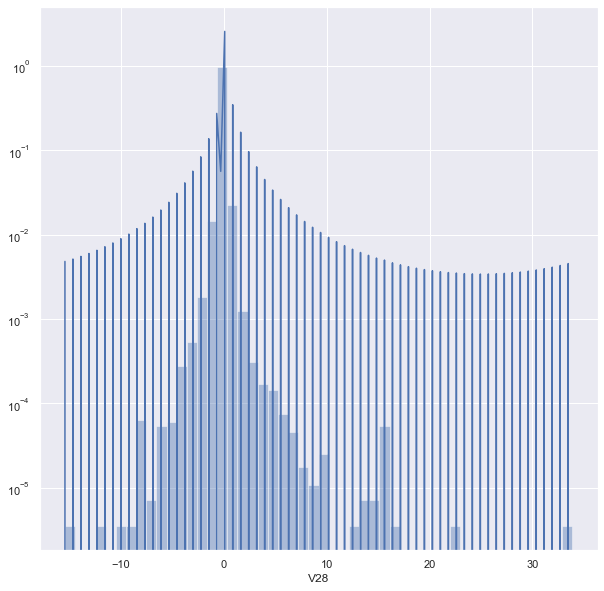

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(10,10))
# dframe2=df[(df.V28>-1) & (df.V28<1)]
ax=sns.distplot(df['V28'])
ax.set_yscale("log")

Dataset contains variables that are a bit skewed.Applying powertransformer to make it more gaussian.

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',copy=False)
pt.fit_transform(X_train)
pt.fit(X_test)
# power_transform(data, method='box-cox')

PowerTransformer(copy=False)

In [20]:
X_train_power_df=pd.DataFrame(data=X_train.iloc[:,:],
                                columns=X_train_saved.columns)
X_train_power_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 7610 to 56088
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      199364 non-null  float64
 1   V2      199364 non-null  float64
 2   V3      199364 non-null  float64
 3   V4      199364 non-null  float64
 4   V5      199364 non-null  float64
 5   V6      199364 non-null  float64
 6   V7      199364 non-null  float64
 7   V8      199364 non-null  float64
 8   V9      199364 non-null  float64
 9   V10     199364 non-null  float64
 10  V11     199364 non-null  float64
 11  V12     199364 non-null  float64
 12  V13     199364 non-null  float64
 13  V14     199364 non-null  float64
 14  V15     199364 non-null  float64
 15  V16     199364 non-null  float64
 16  V17     199364 non-null  float64
 17  V18     199364 non-null  float64
 18  V19     199364 non-null  float64
 19  V20     199364 non-null  float64
 20  V21     199364 non-null  float64
 21  V22     

In [21]:
X_test_power_df=pd.DataFrame(data=X_test.iloc[:,:],
                                columns=X_train_saved.columns)
X_test_power_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85443 entries, 49089 to 283008
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      85443 non-null  float64
 1   V2      85443 non-null  float64
 2   V3      85443 non-null  float64
 3   V4      85443 non-null  float64
 4   V5      85443 non-null  float64
 5   V6      85443 non-null  float64
 6   V7      85443 non-null  float64
 7   V8      85443 non-null  float64
 8   V9      85443 non-null  float64
 9   V10     85443 non-null  float64
 10  V11     85443 non-null  float64
 11  V12     85443 non-null  float64
 12  V13     85443 non-null  float64
 13  V14     85443 non-null  float64
 14  V15     85443 non-null  float64
 15  V16     85443 non-null  float64
 16  V17     85443 non-null  float64
 17  V18     85443 non-null  float64
 18  V19     85443 non-null  float64
 19  V20     85443 non-null  float64
 20  V21     85443 non-null  float64
 21  V22     85443 non-null  float6

Histogram of a variable from the dataset again to see the result of Powertransformer. 

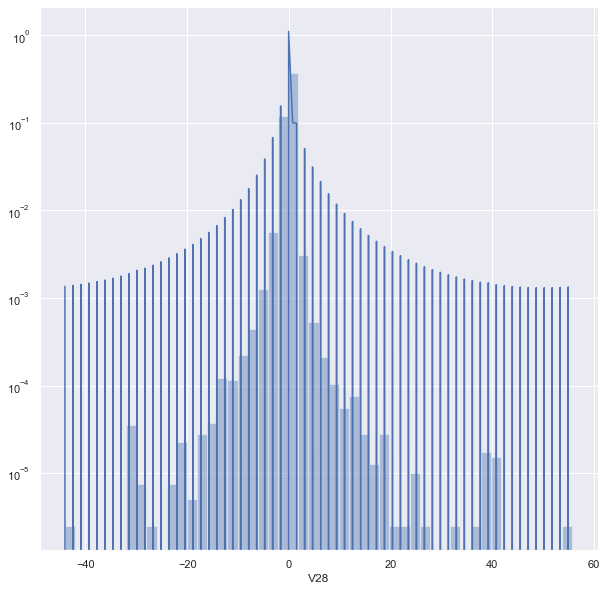

In [22]:

plt.figure(figsize=(10,10))
ax=sns.distplot(X_train_power_df['V28'])
ax.set_yscale("log")

The data looks more gaussian than before.

## Imbalanced Data: Model Building

### Logistic Regression

In [23]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_power_df, y_train)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [24]:
rfe.support_

array([False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False])

In [25]:
list(zip(X_train_power_df.columns, rfe.support_, rfe.ranking_))

[('V1', False, 2),
 ('V2', True, 1),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 7),
 ('V6', True, 1),
 ('V7', True, 1),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', False, 8),
 ('V11', False, 14),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', False, 15),
 ('V18', False, 3),
 ('V19', True, 1),
 ('V20', False, 10),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', False, 6),
 ('V24', False, 12),
 ('V25', False, 5),
 ('V26', False, 4),
 ('V27', False, 9),
 ('V28', False, 11),
 ('Amount', False, 13)]

In [26]:
col = X_train_power_df.columns[rfe.support_]
col

Index(['V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V19', 'V21', 'V22'],
      dtype='object')

In [27]:
X_train_sm = sm.add_constant(X_train_power_df[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199348
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -678.40
Date:                Mon, 17 Aug 2020   Deviance:                       1356.8
Time:                        13:50:14   Pearson chi2:                 5.53e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.8886      0.164    -54.193      0.000      -9.210      -8.567
V2            -0.2149      0.068     -3.182      0.001      -0.347      -0.083
V3            -0.4699      0.088     -5.340      0.000      -0.642      -0.297
V4             0.7898      0.089      8.872      0.000       0.615       0.964
V6             0.1397      0.084      1.671      0.095      -0.024       0.304
V7            -0.1571      0.061     -2.592      0.010      -0.276      -0.038
V8            -0.2209      0.045     -4.949      0.000      -0.308      -0.133
V9            -0.2082      0.082     -2.554      0.011      -0.368      -0.048
V12           -0.7940      0.114     -6.960      0.000      -1.018      -0.570
V13           -0.2389      0.095     -2.525      0.012      -0.424      -0.053
V14           -0.9115      0.070    -13.075      0.000      -1.048      -0.775
V15           -0.1981      0.093     -2.120      0.034      -0.381      -0.015
V16           -0.3470      0.070     -4.933      0.000      -0.485      -0.209
V19           -0.1155      0.078     -1.488      0.137      -0.268       0.037
V21            0.1781      0.066      2.706      0.007       0.049       0.307
V22            0.2625      0.103      2.553      0.011       0.061       0.464
==============================================================================
"""

In [28]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking VIF score

vif = pd.DataFrame()
vif['Features'] = X_train_power_df[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_power_df[col].values, i) for i in range(X_train_power_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,V8,1.07
4,V7,1.05
7,V12,1.05
0,V2,1.03
1,V3,1.03
9,V14,1.02
11,V16,1.02
2,V4,1.01
3,V6,1.01
6,V9,1.01


In [29]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7610      0.000021
190214    0.000035
130590    0.000268
247916    0.000190
55518     0.000054
147392    0.000496
5549      0.000067
182927    0.000064
177760    0.000019
266732    0.000404
dtype: float64

In [30]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.12090557e-05, 3.45364262e-05, 2.68490579e-04, 1.90192534e-04,
       5.41421702e-05, 4.95588086e-04, 6.73032289e-05, 6.43242740e-05,
       1.88745145e-05, 4.03618483e-04])

In [31]:
y_train_pred_final = pd.DataFrame({'Class':y_train.values, 'Class_Prob':y_train_pred})
y_train_pred_final['transaction_id'] = y_train.index
y_train_pred_final.head()

,Class,Class_Prob,transaction_id
0,0,0.000021,7610
1,0,0.000035,190214
2,0,0.000268,130590
3,0,0.000190,247916
4,0,0.000054,55518


In [32]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_Prob,transaction_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000021,7610,1,0,0,0,0,0,0,0,0,0
1,0,0.000035,190214,1,0,0,0,0,0,0,0,0,0
2,0,0.000268,130590,1,0,0,0,0,0,0,0,0,0
3,0,0.000190,247916,1,0,0,0,0,0,0,0,0,0
4,0,0.000054,55518,1,0,0,0,0,0,0,0,0,0


In [33]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001756  1.000000  0.000000
0.1   0.1  0.999373  0.817143  0.999693
0.2   0.2  0.999383  0.785714  0.999759
0.3   0.3  0.999448  0.777143  0.999839
0.4   0.4  0.999373  0.731429  0.999844
0.5   0.5  0.999348  0.700000  0.999874
0.6   0.6  0.999293  0.662857  0.999884
0.7   0.7  0.999243  0.622857  0.999905
0.8   0.8  0.999167  0.580000  0.999905
0.9   0.9  0.999102  0.542857  0.999905


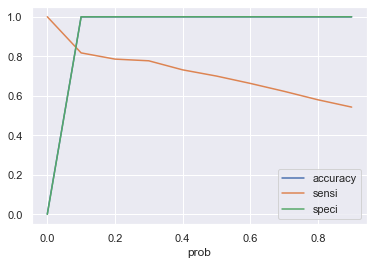

In [34]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [35]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,Class,Class_Prob,transaction_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000021,7610,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000035,190214,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000268,130590,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000190,247916,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000054,55518,1,0,0,0,0,0,0,0,0,0,0


In [36]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Class, y_train_pred_final.final_predicted)

0.9993730061595875

In [37]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Class, y_train_pred_final.final_predicted )
confusion2

array([[198953,     61],
       [    64,    286]], dtype=int64)

In [38]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [39]:
# Let's see the sensitivity of our logistic regression model
print('sensitivity',TP / float(TP+FN))

# Let us calculate specificity
print('specificity', TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate', FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive value', TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value', TN / float(TN+ FN))

sensitivity 0.8171428571428572
specificity 0.9996934889002784
false postive rate 0.00030651109972162764
Positive predictive value 0.8242074927953891
Negative predictive value 0.9996784194315058


In [40]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [41]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Class, y_train_pred_final.Class_Prob, drop_intermediate = False )

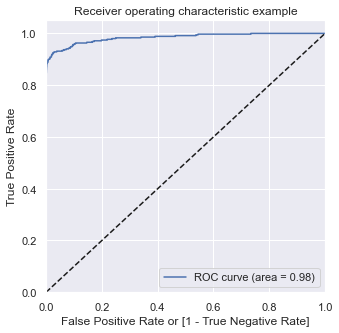

In [42]:
draw_roc(y_train_pred_final.Class, y_train_pred_final.Class_Prob)

### Making Predictions on the test set

In [43]:
X_test = X_test_power_df[col]
X_test.head()

,V2,V3,V4,V6,V7,V8,V9,V12,V13,V14,V15,V16,V19,V21,V22
49089,-0.235478,-0.627166,0.419877,4.069574,-0.896223,1.036103,0.745991,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,0.477431,-0.170060,-0.288750
154704,-0.088751,-2.989257,-0.142575,3.332289,-0.652336,0.752811,1.962566,-2.418093,1.250341,-0.056209,-0.736695,0.014783,-0.450398,-0.184153,-0.089661
67247,-1.469185,0.868279,0.385462,0.368118,-0.499370,0.303698,1.042073,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.231159,0.028010,-0.384708
251657,-0.117215,-1.513910,0.166456,-0.540072,0.116023,-0.216140,0.680314,-0.127579,-0.207945,0.307878,0.213491,0.163032,0.472667,-0.357993,-0.905085
201903,1.587908,-2.368767,5.124413,-0.500419,1.059829,-0.254233,-1.959060,-1.007647,0.470316,-2.771902,0.221958,0.354333,0.668084,-0.035049,0.271455


In [44]:
X_test_sm = sm.add_constant(X_test)

In [45]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

49089     0.000398
154704    0.003093
67247     0.000104
251657    0.000152
201903    0.308603
6079      0.000074
270936    0.000034
40673     0.000167
143209    0.000678
238543    0.000713
dtype: float64

In [46]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
49089,0.000398
154704,0.003093
67247,0.000104
251657,0.000152
201903,0.308603


In [47]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [48]:
# Putting TransacID to index
y_test_df['TransacID'] = y_test_df.index

In [49]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [50]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Class_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransacID','Class','Class_Prob'], axis=1)
y_pred_final['Final_predicted_class'] = y_pred_final.Class_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,TransacID,Class,Class_Prob,Final_predicted_class
0,49089,0,0.000398,0
1,154704,0,0.003093,0
2,67247,0,0.000104,0
3,251657,0,0.000152,0
4,201903,0,0.308603,1


In [51]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.Final_predicted_class)

0.9971325913181888

In [53]:
# clf = ___  #initialise the model with optimum hyperparameters
# clf.fit(X_train, y_train)
# print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [54]:
# var_imp = []
# for i in clf.feature_importances_:
#     var_imp.append(i)
# print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
# print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
# print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# # Variable on Index-16 and Index-13 seems to be the top 2 variables
# top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
# second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# np.random.shuffle(X_train_0)

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [20, 20]

# plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
# plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
#             label='Actual Class-0 Examples')
# plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- SMOTE
- ADASYN

## SMOTE - Model Building

In [55]:
# Logistic Regression
from sklearn import linear_model #import the package


In [56]:
# import joblib
# import sklearn
# print(sklearn.__version__)
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
X_train.head()

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,0.598470,-0.076635,0.414364,0.017924,-0.150960,0.345395,-0.423005,0.053042,1.152344,-0.468132,...,-0.142787,-0.217742,-0.215110,0.229615,-0.518220,-0.140181,1.711153,-0.180481,-0.027825,-1.853467
190214,1.445565,-0.134373,-0.902690,0.208193,0.136115,-0.409005,0.073299,-0.252318,0.277355,0.257359,...,-0.220963,-0.355324,-0.881595,0.418801,-0.841362,-0.510193,0.511993,-0.206056,-0.220886,-1.446662
130590,0.843049,-0.987411,-0.652970,-1.919788,0.423178,2.278265,-1.478071,0.853644,-1.629738,1.315947,...,-0.090662,-0.009865,0.104342,-0.203779,1.917859,0.990486,0.014536,0.099397,0.107899,0.706491
247916,-0.326321,0.805913,-0.366669,-0.296532,0.512231,-0.805682,0.794658,-0.185940,0.130993,-0.479100,...,0.173877,-0.457294,-1.012077,0.252022,1.861162,-0.857357,0.288656,0.854371,0.473371,-1.576187
55518,0.566536,-0.144094,0.637616,0.445581,-0.564414,0.053504,-0.482081,0.184401,0.269297,0.107031,...,-0.222159,0.013937,-0.092414,0.225649,0.287704,-0.037162,0.529867,-0.020486,0.051746,-0.715547


### Print the class distribution after applying SMOTE 

In [57]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape

(199364, 29)

Using PowerTransformer to remove skewness

In [58]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',copy=False)
pt.fit_transform(X_train)
pt.fit(X_test)

X_train_power_df=pd.DataFrame(data=X_train.iloc[:,:],
                                columns=X_train_saved.columns)
X_train_power_df.info()

X_test_power_df=pd.DataFrame(data=X_test.iloc[:,:],
                                columns=X_train_saved.columns)
X_test_power_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 7610 to 56088
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      199364 non-null  float64
 1   V2      199364 non-null  float64
 2   V3      199364 non-null  float64
 3   V4      199364 non-null  float64
 4   V5      199364 non-null  float64
 5   V6      199364 non-null  float64
 6   V7      199364 non-null  float64
 7   V8      199364 non-null  float64
 8   V9      199364 non-null  float64
 9   V10     199364 non-null  float64
 10  V11     199364 non-null  float64
 11  V12     199364 non-null  float64
 12  V13     199364 non-null  float64
 13  V14     199364 non-null  float64
 14  V15     199364 non-null  float64
 15  V16     199364 non-null  float64
 16  V17     199364 non-null  float64
 17  V18     199364 non-null  float64
 18  V19     199364 non-null  float64
 19  V20     199364 non-null  float64
 20  V21     199364 non-null  float64
 21  V22     

(398028,)
7610      0
190214    0
130590    0
247916    0
55518     0
         ..
212912    0
65615     0
253799    0
210755    0
56088     0
Name: Class, Length: 199364, dtype: int64
   Class
0      0
1      0
2      0
3      0
4      0


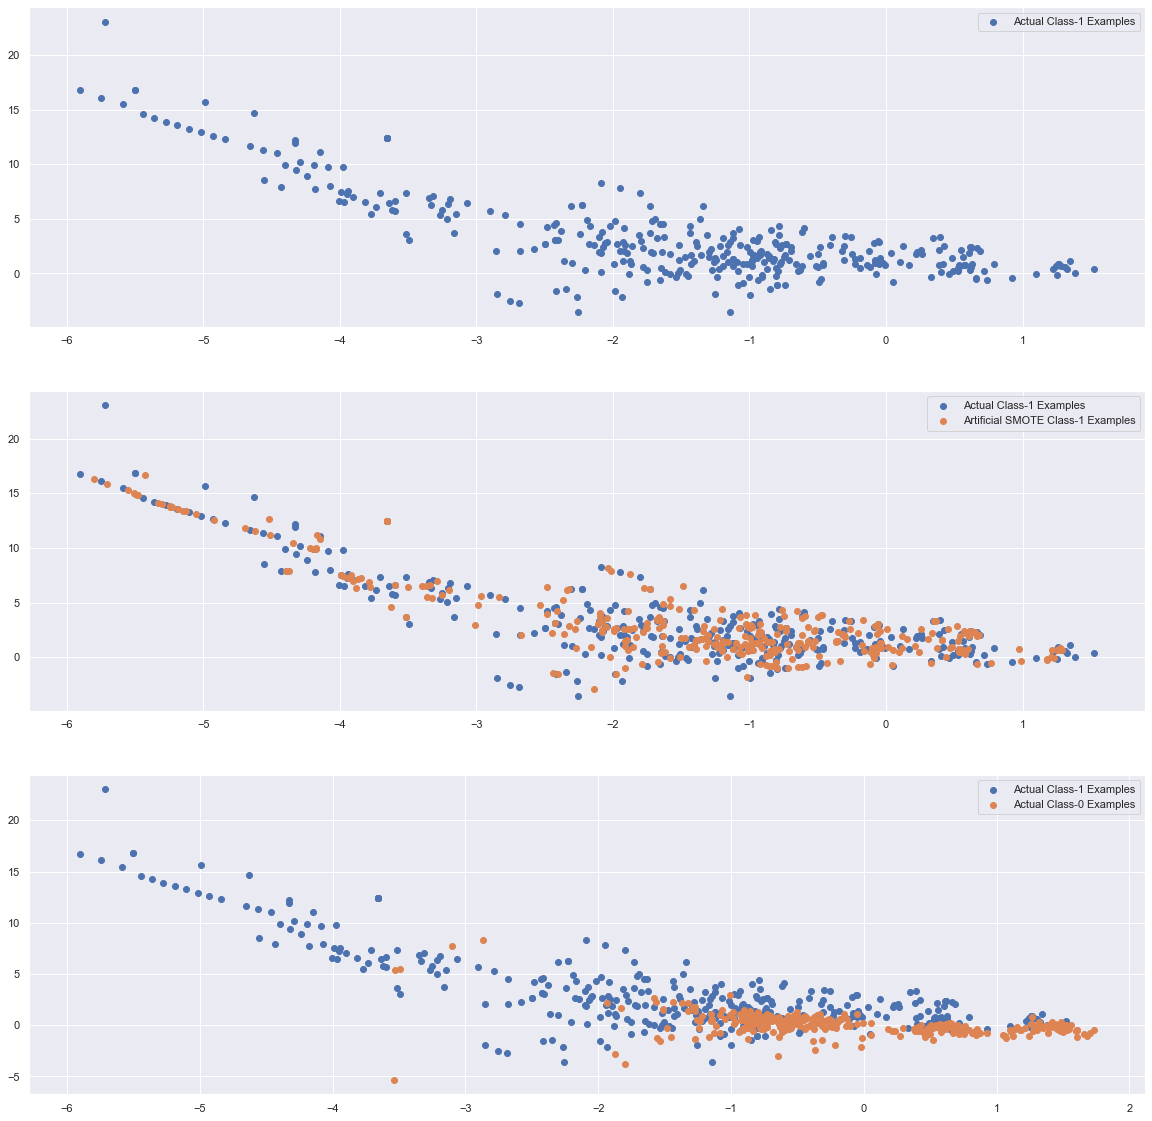

In [59]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_sample(X_train_power_df, y_train)

print(y_train_smote.shape)
print(y_train)
X_train_smote_df=pd.DataFrame(data=X_train_smote[:,:],
                                columns=X_train.columns)
y_train_smote_df=pd.DataFrame(data=y_train_smote[:],
                                columns=['Class'])

# print(X_train_smote_df.head())
print(y_train_smote_df.head())

X_train_smote_df_saved=X_train_smote_df
y_train_smote_df_saved=y_train_smote_df

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

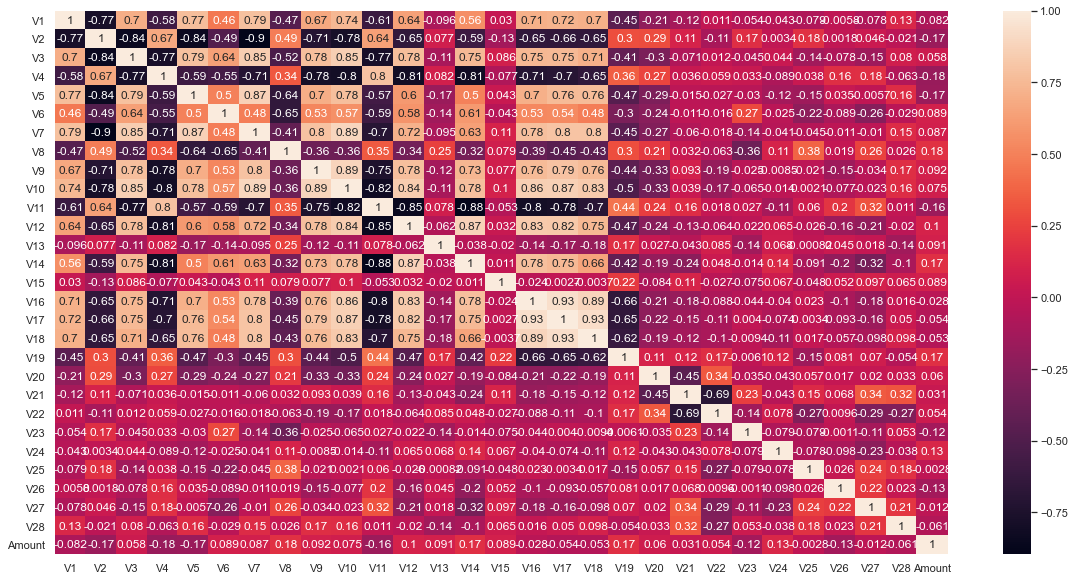

In [60]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train_smote_df.corr(),annot = True)
plt.show()

In [61]:
X_test = X_test_power_df.drop(['V1','V2','V3','V17','V12','V16','V10','V14'], axis=1)
X_train_smote_df = X_train_smote_df.drop(['V1','V2','V3','V17','V12','V16','V10','V14'], 1)

X_test.shape

(85443, 21)

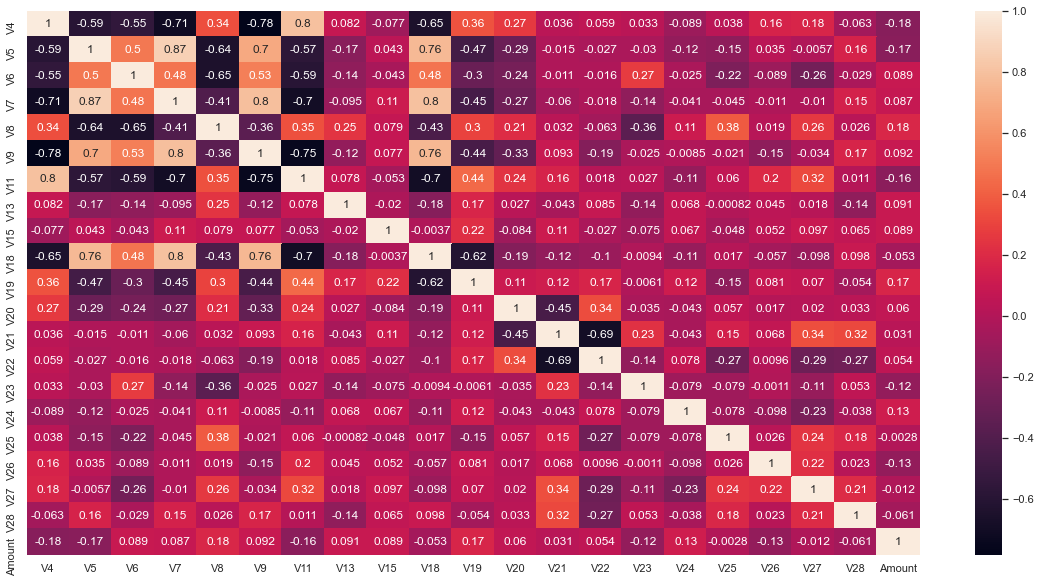

In [62]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train_smote_df.corr(),annot = True)
plt.show()

In [63]:
# Apply Logistic Regression on SMOTE balanced data and see
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_smote_df, y_train_smote_df)
print(y_train_smote_df.head())

   Class
0      0
1      0
2      0
3      0
4      0


In [64]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True, False,  True,
        True,  True,  True])

In [65]:
list(zip(X_train_smote_df.columns, rfe.support_, rfe.ranking_))

[('V4', True, 1),
 ('V5', True, 1),
 ('V6', True, 1),
 ('V7', False, 7),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V11', True, 1),
 ('V13', True, 1),
 ('V15', True, 1),
 ('V18', False, 5),
 ('V19', False, 4),
 ('V20', True, 1),
 ('V21', True, 1),
 ('V22', False, 3),
 ('V23', False, 6),
 ('V24', True, 1),
 ('V25', False, 2),
 ('V26', True, 1),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount', True, 1)]

In [66]:
col = X_train_smote_df.columns[rfe.support_]
col

Index(['V4', 'V5', 'V6', 'V8', 'V9', 'V11', 'V13', 'V15', 'V20', 'V21', 'V24',
       'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [67]:
X_train_smote_df_sm = sm.add_constant(X_train_smote_df[col])
logm3 = sm.GLM(y_train_smote_df, X_train_smote_df_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               398028
Model:                            GLM   Df Residuals:                   398012
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71633.
Date:                Mon, 17 Aug 2020   Deviance:                   1.4327e+05
Time:                        13:51:47   Pearson chi2:                 4.94e+15
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5013      0.013   -264.725      0.000      -3.527      -3.475
V4             1.8427      0.009    198.380      0.000       1.824       1.861
V5            -0.5629      0.009    -61.031      0.000      -0.581      -0.545
V6            -1.2316      0.011   -108.587      0.000      -1.254      -1.209
V8            -0.5753      0.006    -95.282      0.000      -0.587      -0.563
V9            -0.3617      0.008    -44.190      0.000      -0.378      -0.346
V11            0.9601      0.007    135.651      0.000       0.946       0.974
V13           -0.3074      0.007    -43.732      0.000      -0.321      -0.294
V15           -0.3031      0.007    -40.856      0.000      -0.318      -0.289
V20           -0.1046      0.007    -14.038      0.000      -0.119      -0.090
V21            0.1452      0.006     24.202      0.000       0.133       0.157
V24           -0.6648      0.010    -68.109      0.000      -0.684      -0.646
V26           -0.1167      0.008    -14.744      0.000      -0.132      -0.101
V27            0.1292      0.008     16.258      0.000       0.114       0.145
V28            0.2287      0.008     27.163      0.000       0.212       0.245
Amount         0.1913      0.007     26.851      0.000       0.177       0.205
==============================================================================
"""

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking VIF score

vif = pd.DataFrame()
vif['Features'] = X_train_smote_df[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote_df[col].values, i) for i in range(X_train_smote_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,V11,6.19
4,V9,5.68
0,V4,5.37
1,V5,4.62
3,V8,3.32
2,V6,3.10
9,V21,1.98
8,V20,1.72
12,V27,1.72
13,V28,1.34


In [69]:
# Getting the predicted values on the train set

y_train_smote_pred = res.predict(X_train_smote_df_sm)
# y_train_smote_pred[:10]
y_train_smote_df.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [70]:
y_train_smote_pred = y_train_smote_pred.values.reshape(-1)
y_train_smote_pred[:10]

array([6.10771987e-02, 1.35101511e-01, 6.97271167e-06, 8.18836400e-03,
       1.73142130e-01, 2.31262821e-03, 1.63808416e-01, 2.98414802e-02,
       4.26478974e-02, 1.89325827e-01])

In [71]:
from pandas import Series
y_train_smote_pred_final=y_train_smote_df
y_train_smote_pred_final['Class_Prob'] = y_train_smote_pred
# y_train_smote_pred_final = pd.DataFrame({'Class':y_train_smote_df.values, 'Class_Prob':y_train_smote_pred})
y_train_smote_pred_final['transac_id'] = y_train_smote_df.index
y_train_smote_pred_final.head()

,Class,Class_Prob,transac_id
0,0,0.061077,0
1,0,0.135102,1
2,0,0.000007,2
3,0,0.008188,3
4,0,0.173142,4


In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_smote_pred_final[i]= y_train_smote_pred_final.Class_Prob.map(lambda x: 1 if x > i else 0)
y_train_smote_pred_final.head()

,Class,Class_Prob,transac_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061077,0,1,0,0,0,0,0,0,0,0,0
1,0,0.135102,1,1,1,0,0,0,0,0,0,0,0
2,0,0.000007,2,1,0,0,0,0,0,0,0,0,0
3,0,0.008188,3,1,0,0,0,0,0,0,0,0,0
4,0,0.173142,4,1,1,0,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smote_pred_final.Class, y_train_smote_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.841657  0.983247  0.700066
0.2   0.2  0.891789  0.949205  0.834373
0.3   0.3  0.912318  0.927608  0.897027
0.4   0.4  0.923340  0.913725  0.932954
0.5   0.5  0.928276  0.900896  0.955656
0.6   0.6  0.927985  0.885114  0.970856
0.7   0.7  0.923938  0.866522  0.981353
0.8   0.8  0.918013  0.847292  0.988734
0.9   0.9  0.902713  0.810893  0.994533


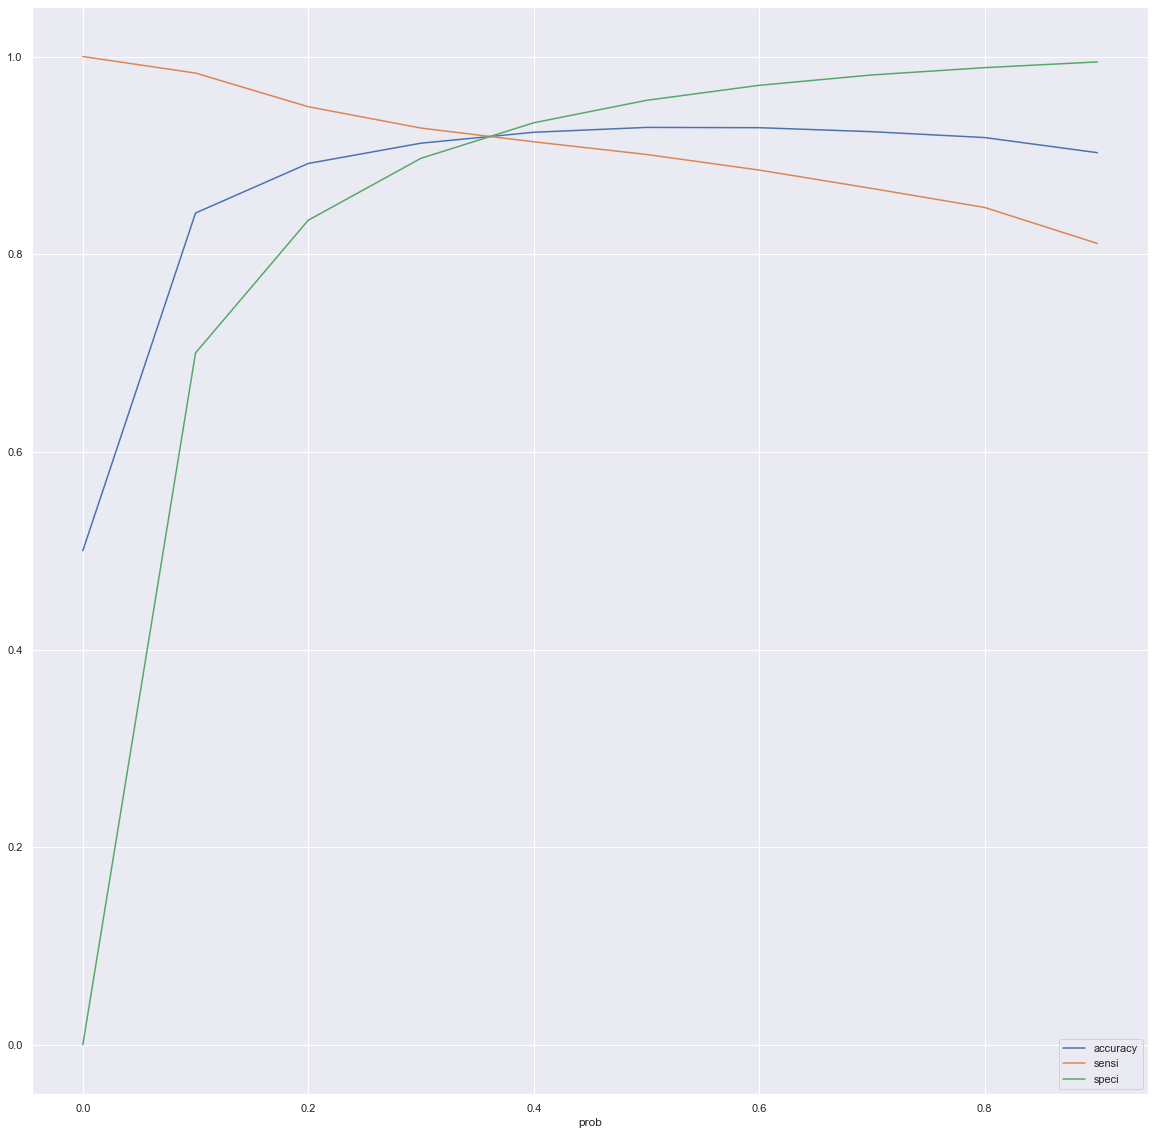

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [75]:
y_train_smote_pred_final['final_predicted'] = y_train_smote_pred_final.Class_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_smote_pred_final.head()

,Class,Class_Prob,transac_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.061077,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.135102,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000007,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.008188,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.173142,4,1,1,0,0,0,0,0,0,0,0,0


In [76]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_smote_pred_final.Class, y_train_smote_pred_final.final_predicted)

0.9123177263911082

In [77]:
confusion2 = metrics.confusion_matrix(y_train_smote_pred_final.Class, y_train_smote_pred_final.final_predicted )
confusion2

array([[178521,  20493],
       [ 14407, 184607]], dtype=int64)

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('sensitivity',TP / float(TP+FN))

# Let us calculate specificity
print('specificity', TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate', FP/ float(TN+FP))

# Positive predictive value 
print ('Positive predictive value', TP / float(TP+FP))

# Negative predictive value
print ('Negative predictive value', TN / float(TN+ FN))

sensitivity 0.9276081079723034
specificity 0.8970273448099129
false postive rate 0.10297265519008712
Positive predictive value 0.9000828863968796
Negative predictive value 0.9253244733786697


In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

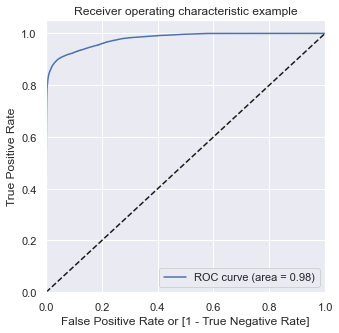

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_smote_pred_final.Class, y_train_smote_pred_final.Class_Prob, drop_intermediate = False )
draw_roc(y_train_smote_pred_final.Class, y_train_smote_pred_final.Class_Prob)

## Making Predictions on the test set

In [81]:
X_test = X_test[col]
X_test.head()

,V4,V5,V6,V8,V9,V11,V13,V15,V20,V21,V24,V26,V27,V28,Amount
49089,0.419877,1.797014,4.069574,1.036103,0.745991,-0.850459,-0.259849,-0.766810,-0.057922,-0.170060,1.025935,-0.271476,0.060052,0.018104,1.99
154704,-0.142575,2.675427,3.332289,0.752811,1.962566,1.126976,1.250341,-0.736695,-0.147619,-0.184153,0.570679,0.620842,-0.048958,-0.042831,6.99
67247,0.385462,-1.439135,0.368118,0.303698,1.042073,1.145725,-1.095634,-0.621880,0.437685,0.028010,0.286638,0.913904,-0.083364,0.052485,306.16
251657,0.166456,0.359070,-0.540072,-0.216140,0.680314,-1.705327,-0.207945,0.213491,-0.227278,-0.357993,-1.075605,0.267672,-0.071733,-0.072238,0.99
201903,5.124413,2.171788,-0.500419,-0.254233,-1.959060,-0.288169,0.470316,0.221958,0.249457,-0.035049,0.332001,0.448890,0.168585,0.004955,30.27


In [82]:
X_test_sm = sm.add_constant(X_test)

In [83]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

49089     0.000030
154704    0.000160
67247     1.000000
251657    0.024791
201903    0.999986
6079      0.089356
270936    1.000000
40673     0.985448
143209    1.000000
238543    1.000000
dtype: float64

In [84]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
49089,0.000030
154704,0.000160
67247,1.000000
251657,0.024791
201903,0.999986


In [85]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [86]:
# Putting TransacID to index
y_test_df['TransacID'] = y_test_df.index

In [87]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [88]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Class_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['TransacID','Class','Class_Prob'], axis=1)
y_pred_final['Final_predicted_class'] = y_pred_final.Class_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,TransacID,Class,Class_Prob,Final_predicted_class
0,49089,0,0.000030,0
1,154704,0,0.000160,0
2,67247,0,1.000000,1
3,251657,0,0.024791,0
4,201903,0,0.999986,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Class, y_pred_final.Final_predicted_class)

0.3475065248177147

## SMOTE - Random Forest

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',copy=False)
pt.fit_transform(X_train)
pt.fit(X_test)

X_train_power_df=pd.DataFrame(data=X_train.iloc[:,:],
                                columns=X_train_saved.columns)

X_test_power_df=pd.DataFrame(data=X_test.iloc[:,:],
                                columns=X_train_saved.columns)

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_sample(X_train_power_df, y_train)

print(y_train_smote.shape)
print(y_train)
X_train_smote_df=pd.DataFrame(data=X_train_smote[:,:],
                                columns=X_train.columns)
y_train_smote_df=pd.DataFrame(data=y_train_smote[:],
                                columns=['Class'])

print(X_train_smote_df.head())
print(y_train_smote_df.head())

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the randomized search model
model_cv = RandomizedSearchCV(estimator = rf, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)

In [ ]:
# Fit the grid search to the data
X_train=X_train_smote_df
y_train=y_train_smote_df
model_cv.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# predict
X_test=X_test_power_df
predictions = rfc.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

## SMOTE - XGBoost 

In [90]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape

(199364, 29)

In [91]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',copy=False)
pt.fit_transform(X_train)
pt.fit(X_test)

X_train_power_df=pd.DataFrame(data=X_train.iloc[:,:],
                                columns=X_train_saved.columns)
# X_train_power_df.info()

X_test_power_df=pd.DataFrame(data=X_test.iloc[:,:],
                                columns=X_train_saved.columns)
# X_test_power_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 7610 to 56088
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      199364 non-null  float64
 1   V2      199364 non-null  float64
 2   V3      199364 non-null  float64
 3   V4      199364 non-null  float64
 4   V5      199364 non-null  float64
 5   V6      199364 non-null  float64
 6   V7      199364 non-null  float64
 7   V8      199364 non-null  float64
 8   V9      199364 non-null  float64
 9   V10     199364 non-null  float64
 10  V11     199364 non-null  float64
 11  V12     199364 non-null  float64
 12  V13     199364 non-null  float64
 13  V14     199364 non-null  float64
 14  V15     199364 non-null  float64
 15  V16     199364 non-null  float64
 16  V17     199364 non-null  float64
 17  V18     199364 non-null  float64
 18  V19     199364 non-null  float64
 19  V20     199364 non-null  float64
 20  V21     199364 non-null  float64
 21  V22     

In [92]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_sample(X_train_power_df, y_train)

# print(y_train_smote.shape)
# print(y_train)
X_train_smote_df=pd.DataFrame(data=X_train_smote[:,:],
                                columns=X_train.columns)
y_train_smote_df=pd.DataFrame(data=y_train_smote[:],
                                columns=['Class'])

# print(X_train_smote_df.head())
# print(y_train_smote_df.head())

# X_train_smote_df_saved=X_train_smote_df
# y_train_smote_df_saved=y_train_smote_df

(398028,)
7610      0
190214    0
130590    0
247916    0
55518     0
         ..
212912    0
65615     0
253799    0
210755    0
56088     0
Name: Class, Length: 199364, dtype: int64
         V1        V2        V3        V4        V5        V6        V7  \
0  0.598470 -0.076635  0.414364  0.017924 -0.150960  0.345395 -0.423005   
1  1.445565 -0.134373 -0.902690  0.208193  0.136115 -0.409005  0.073299   
2  0.843049 -0.987411 -0.652970 -1.919788  0.423178  2.278265 -1.478071   
3 -0.326321  0.805913 -0.366669 -0.296532  0.512231 -0.805682  0.794658   
4  0.566536 -0.144094  0.637616  0.445581 -0.564414  0.053504 -0.482081   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.053042  1.152344 -0.468132  ... -0.142787 -0.217742 -0.215110  0.229615   
1 -0.252318  0.277355  0.257359  ... -0.220963 -0.355324 -0.881595  0.418801   
2  0.853644 -1.629738  1.315947  ... -0.090662 -0.009865  0.104342 -0.203779   
3 -0.185940  0.130993 -0.479100  ...  0.17387

In [93]:
# fit model on training data with default hyperparameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


model = XGBClassifier()
model.fit(X_train_smote_df, y_train_smote_df)
# y_train_smote_df_saved.head()

XGBClassifier()

In [94]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
X_test=X_test_power_df
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[0.9862408 , 0.01375922],
       [0.99766654, 0.00233346],
       [0.9971656 , 0.00283439],
       [0.9912908 , 0.0087092 ],
       [0.25179678, 0.7482032 ],
       [0.9790035 , 0.02099649],
       [0.99640524, 0.00359475],
       [0.97611034, 0.02388966],
       [0.96528834, 0.03471167],
       [0.85385096, 0.14614905]], dtype=float32)

In [95]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 97.19%


Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters. 

In [96]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [97]:
# fit the model
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 18.9min finished


RandomizedSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
                   param_distributions={'learning_rate': [0.2, 0.6],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [98]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,49.731845,0.106753,0.664174,0.007893,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.971153,0.958423,0.978262,0.969279,0.008207,5,0.999767,0.999967,0.999798,0.999844,0.000088
1,66.490372,0.101291,0.645694,0.016465,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",0.986520,0.962944,0.979508,0.976324,0.009884,1,0.999967,0.999993,0.999912,0.999957,0.000034
2,69.641264,0.129795,0.675246,0.014351,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.981058,0.964820,0.979530,0.975136,0.007321,2,0.999960,0.999995,0.999945,0.999966,0.000021
3,48.700472,0.353676,0.710860,0.009497,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.973290,0.947848,0.978413,0.966517,0.013365,6,0.999989,1.000000,0.999998,0.999996,0.000005
4,63.794193,0.961433,0.722783,0.002419,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",0.969124,0.967006,0.973862,0.969997,0.002866,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,67.827337,1.418176,0.663395,0.027079,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",0.970385,0.964742,0.979517,0.971548,0.006088,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [99]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
# cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,49.731845,0.106753,0.664174,0.007893,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.971153,0.958423,0.978262,0.969279,0.008207,5,0.999767,0.999967,0.999798,0.999844,0.000088
1,66.490372,0.101291,0.645694,0.016465,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",0.986520,0.962944,0.979508,0.976324,0.009884,1,0.999967,0.999993,0.999912,0.999957,0.000034
2,69.641264,0.129795,0.675246,0.014351,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.981058,0.964820,0.979530,0.975136,0.007321,2,0.999960,0.999995,0.999945,0.999966,0.000021
3,48.700472,0.353676,0.710860,0.009497,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.973290,0.947848,0.978413,0.966517,0.013365,6,0.999989,1.000000,0.999998,0.999996,0.000005
4,63.794193,0.961433,0.722783,0.002419,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",0.969124,0.967006,0.973862,0.969997,0.002866,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,67.827337,1.418176,0.663395,0.027079,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",0.970385,0.964742,0.979517,0.971548,0.006088,3,1.000000,1.000000,1.000000,1.000000,0.000000


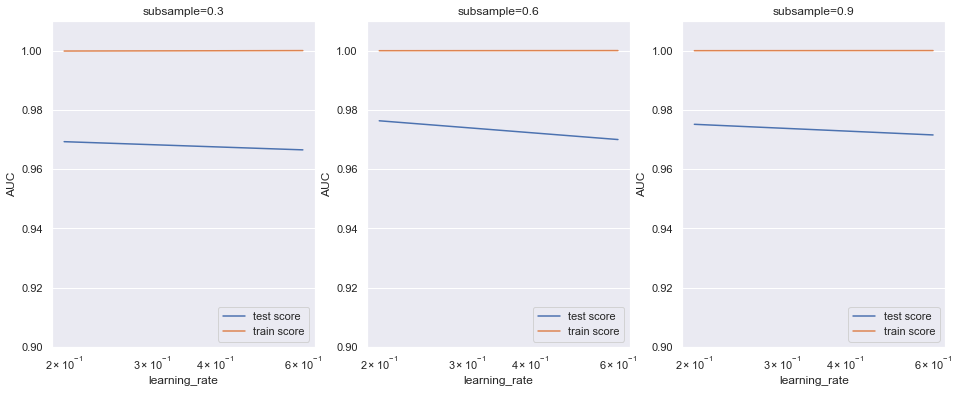

In [100]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.9, 1.01])
    plt.legend(['test score', 'train score'], loc='lower right')
    plt.xscale('log')

In [101]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [102]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.9989885e-01, 1.0114923e-04],
       [9.9976420e-01, 2.3579923e-04],
       [9.9994588e-01, 5.4141092e-05],
       [9.9985987e-01, 1.4010581e-04],
       [9.8334867e-01, 1.6651340e-02],
       [9.9968374e-01, 3.1627677e-04],
       [9.9994594e-01, 5.4056018e-05],
       [9.9972105e-01, 2.7893210e-04],
       [9.9978560e-01, 2.1437551e-04],
       [9.9985600e-01, 1.4399791e-04]], dtype=float32)

In [103]:
# roc_auc
import sklearn
from sklearn import metrics
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.9695270071797121

### Print the class distribution after applying ADASYN

In [106]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape

(199364, 29)

Removing the skewness using PowerTransformer

In [107]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',copy=False)
pt.fit_transform(X_train)
pt.fit(X_test)

X_train_power_df=pd.DataFrame(data=X_train.iloc[:,:],
                                columns=X_train_saved.columns)
# X_train_power_df.info()

X_test_power_df=pd.DataFrame(data=X_test.iloc[:,:],
                                columns=X_train_saved.columns)
# X_test_power_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 7610 to 56088
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      199364 non-null  float64
 1   V2      199364 non-null  float64
 2   V3      199364 non-null  float64
 3   V4      199364 non-null  float64
 4   V5      199364 non-null  float64
 5   V6      199364 non-null  float64
 6   V7      199364 non-null  float64
 7   V8      199364 non-null  float64
 8   V9      199364 non-null  float64
 9   V10     199364 non-null  float64
 10  V11     199364 non-null  float64
 11  V12     199364 non-null  float64
 12  V13     199364 non-null  float64
 13  V14     199364 non-null  float64
 14  V15     199364 non-null  float64
 15  V16     199364 non-null  float64
 16  V17     199364 non-null  float64
 17  V18     199364 non-null  float64
 18  V19     199364 non-null  float64
 19  V20     199364 non-null  float64
 20  V21     199364 non-null  float64
 21  V22     

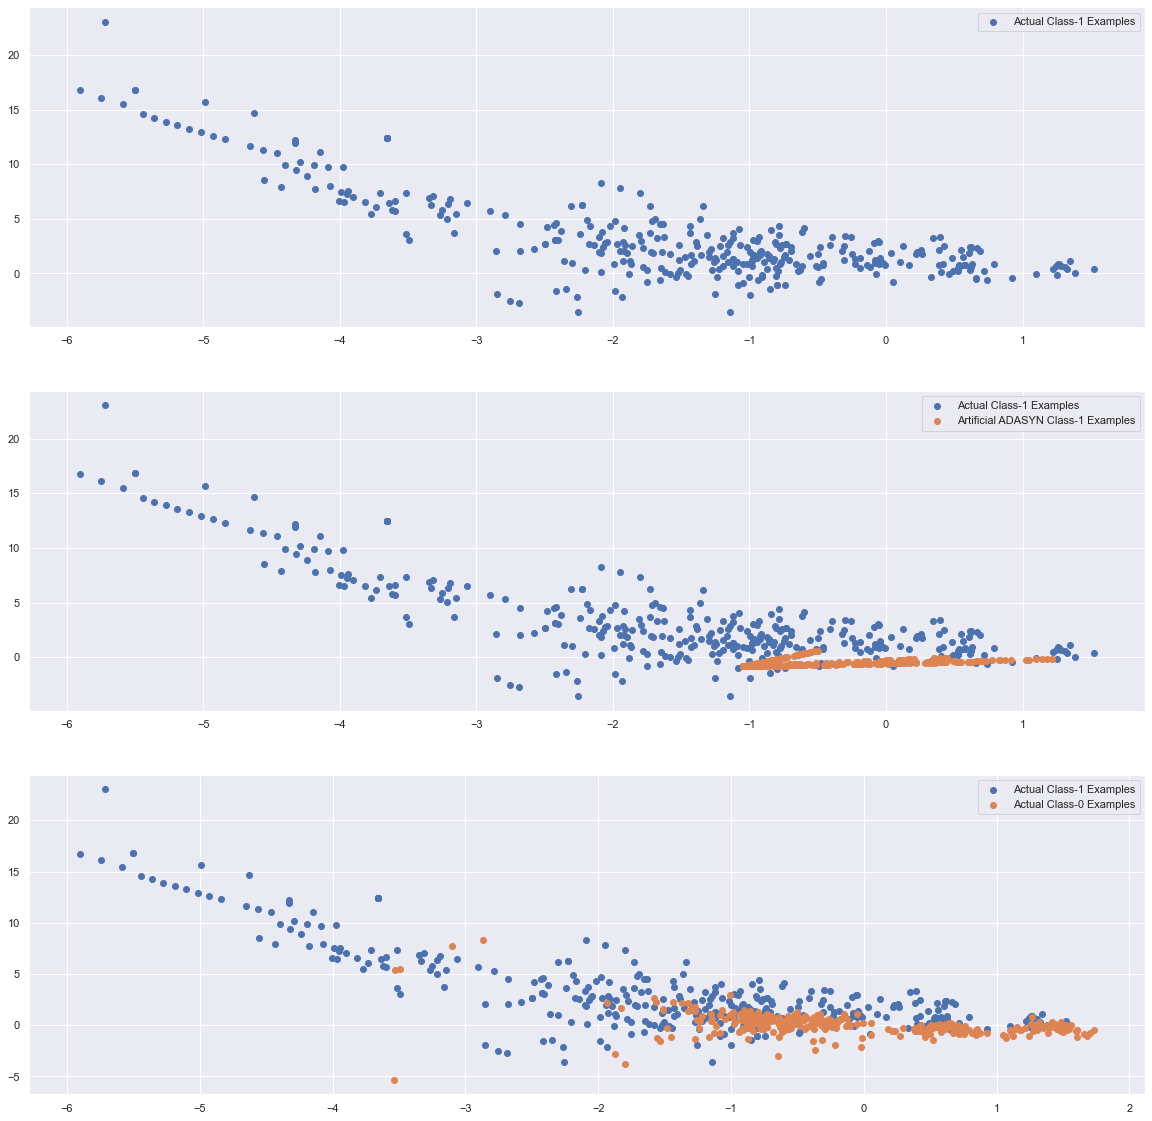

In [108]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_sample(X_train_power_df, y_train)

X_train_adasyn_df=pd.DataFrame(data=X_train_adasyn[:,:],
                                columns=X_train.columns)
y_train_adasyn_df=pd.DataFrame(data=y_train_adasyn[:],
                                columns=['Class'])
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## ADASYN - XGBoost 

In [109]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train_adasyn_df, y_train_adasyn_df)

XGBClassifier()

In [110]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
X_test=X_test_power_df
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[0.9776968 , 0.02230322],
       [0.9842554 , 0.01574465],
       [0.9964403 , 0.00355973],
       [0.98539346, 0.01460651],
       [0.32206815, 0.67793185],
       [0.9311683 , 0.06883167],
       [0.9956553 , 0.00434473],
       [0.9736961 , 0.02630391],
       [0.99333936, 0.00666066],
       [0.66419244, 0.33580753]], dtype=float32)

In [111]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 96.82%


Let's now try tuning the hyperparameters using k-fold CV. We'll then use randomizedsearch CV to find the optimal values of hyperparameters.

In [112]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [113]:
# fit the model
model_cv.fit(X_train_adasyn_df, y_train_adasyn_df) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 24.7min finished


RandomizedSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
                   param_distributions={'learning_rate': [0.2, 0.6],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [114]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,110.394919,7.805089,1.188575,0.059846,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.980995,0.989997,0.984690,0.985227,0.003695,4,0.999494,0.999446,0.999513,0.999484,0.000028
1,90.326351,25.754132,0.503210,0.003271,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",0.979732,0.989823,0.985845,0.985133,0.004150,5,0.999465,0.999484,0.999427,0.999458,0.000024
2,77.235123,2.278539,0.587746,0.113908,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.976036,0.990083,0.984918,0.983679,0.005801,6,0.999484,0.999452,0.999469,0.999468,0.000013
3,56.069781,3.796772,0.527741,0.006549,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.981476,0.997713,0.989320,0.989503,0.006630,1,0.999955,0.999970,0.999952,0.999959,0.000008
4,72.708585,1.475035,0.593602,0.071364,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",0.978593,0.997944,0.991161,0.989233,0.008017,2,0.999976,0.999979,0.999968,0.999974,0.000005
5,74.952817,1.577532,0.532572,0.026058,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",0.975936,0.997853,0.991710,0.988500,0.009231,3,0.999978,0.999981,0.999973,0.999977,0.000004


In [115]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
# cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,110.394919,7.805089,1.188575,0.059846,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.980995,0.989997,0.984690,0.985227,0.003695,4,0.999494,0.999446,0.999513,0.999484,0.000028
1,90.326351,25.754132,0.503210,0.003271,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",0.979732,0.989823,0.985845,0.985133,0.004150,5,0.999465,0.999484,0.999427,0.999458,0.000024
2,77.235123,2.278539,0.587746,0.113908,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.976036,0.990083,0.984918,0.983679,0.005801,6,0.999484,0.999452,0.999469,0.999468,0.000013
3,56.069781,3.796772,0.527741,0.006549,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.981476,0.997713,0.989320,0.989503,0.006630,1,0.999955,0.999970,0.999952,0.999959,0.000008
4,72.708585,1.475035,0.593602,0.071364,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",0.978593,0.997944,0.991161,0.989233,0.008017,2,0.999976,0.999979,0.999968,0.999974,0.000005


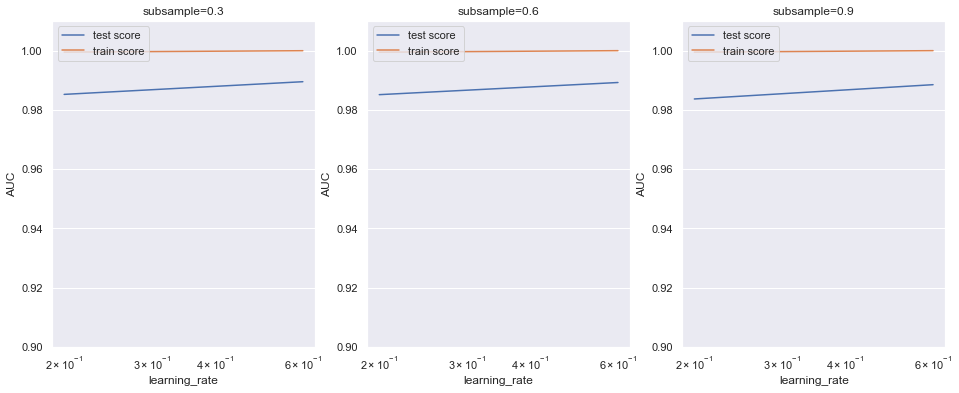

In [127]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.9, 1.01])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [117]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_adasyn_df, y_train_adasyn_df)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

In [118]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[0.9776968 , 0.02230322],
       [0.9842554 , 0.01574465],
       [0.9964403 , 0.00355973],
       [0.98539346, 0.01460651],
       [0.32206815, 0.67793185],
       [0.9311683 , 0.06883167],
       [0.9956553 , 0.00434473],
       [0.9736961 , 0.02630391],
       [0.99333936, 0.00666066],
       [0.66419244, 0.33580753]], dtype=float32)

In [119]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.968212977705626

## ADASYN - Random Forest

In [122]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape

(199364, 29)

In [123]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',copy=False)
pt.fit_transform(X_train)
pt.fit(X_test)

X_train_power_df=pd.DataFrame(data=X_train.iloc[:,:],
                                columns=X_train_saved.columns)

X_test_power_df=pd.DataFrame(data=X_test.iloc[:,:],
                                columns=X_train_saved.columns)

In [124]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_sample(X_train_power_df, y_train)

X_train_adasyn_df=pd.DataFrame(data=X_train_adasyn[:,:],
                                columns=X_train.columns)
y_train_adasyn_df=pd.DataFrame(data=y_train_adasyn[:],
                                columns=['Class'])

In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the randomized search model
model_cv = RandomizedSearchCV(estimator = rf, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)

In [126]:
# Fit the grid search to the data
X_train=X_train_adasyn_df
y_train=y_train_adasyn_df
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 224.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [129]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.9874271788730223 using {'n_estimators': 100, 'min_samples_split': 200, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 10}


In [130]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [132]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [133]:
# predict
X_test=X_test_power_df
predictions = rfc.predict(X_test)

In [134]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.84      0.15       142

    accuracy                           0.98     85443
   macro avg       0.54      0.91      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [136]:
print(confusion_matrix(y_test,predictions))

[[83998  1303]
 [   23   119]]


### Important features of the best model to understand the dataset

In [ ]:
Top Model: SMOTE-Random Forest


Top var = V14
2nd Top var = V10
3rd Top var = V12

------------------------------------------------------
Accuracy of 0.9993950588457534 using {'n_estimators': 100, 
                                      'min_samples_split': 400, 
                                      'min_samples_leaf': 100,
                                      'max_features': 5, 
                                      'max_depth': 10}

------------------------------------------------------
classification_report(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.19      0.84      0.31       142

    accuracy                           0.99     85443
   macro avg       0.60      0.92      0.65     85443
weighted avg       1.00      0.99      1.00     85443

------------------------------------------------------
